In [ ]:
#conda install -c conda-forge geopandas

In [8]:
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [9]:
from input_enem import categorical_labels

In [10]:
sh_uf = shp.Reader("../Utils/GEO/shp/BR_UF_2021/BR_UF_2021.shp")
sh_mun = gpd.read_file("../Utils/GEO/shp/BR_Municipios_2021/BR_Municipios_2021.shp")

ERROR 1: PROJ: proj_create_from_database: Open of /home/joao/anaconda3/envs/scraping/share/proj failed


## Funções

In [17]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
    #fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    #converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
    #assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [24]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map


## Views

Visualizando Score Médio por município

<AxesSubplot:>

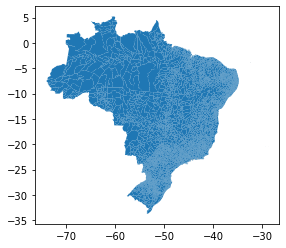

In [5]:
sh_mun.plot()

In [31]:
med_enem = pd.read_parquet('../../Resultados/Agg/ENEM/anual/notas/medio_nota_pub_pvd.parquet').reset_index().drop(columns=['TP_DEPENDENCIA_ADM_ESC','index','NO_MUNICIPIO_ESC','SG_UF_ESC'])
median_enem = pd.read_parquet('../../Resultados/Agg/ENEM/2019/pub_pvd_mediana.parquet').reset_index()

In [34]:
med_enem.TP_ESCOLA = med_enem.TP_ESCOLA.replace(categorical_labels['TP_ESCOLA'])
med_enem.NU_ANO = med_enem.NU_ANO.astype(int)

In [38]:
med_enem.head()

,NU_ANO,CO_MUNICIPIO_ESC,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NT_MEDIA
0,2019,1100015,Pública,468.857522,491.323684,503.919298,503.683186,589.824561,512.695044
1,2019,1100023,Pública,467.460000,495.127916,511.167113,513.599592,569.330784,513.760205
2,2019,1100031,Pública,441.929412,470.415000,470.985000,467.000000,467.000000,474.951765
3,2019,1100049,Pública,469.611833,491.141129,506.188710,519.650833,546.806452,508.188748
4,2019,1100080,Pública,437.203125,463.038889,478.311111,484.678125,437.222222,466.355625


In [39]:
med_enem_pub = med_enem[med_enem.TP_ESCOLA == 'Pública']

In [41]:
geo_med_enem_pub = sh_mun.merge(med_enem_pub, left_on='CD_MUN', right_on='CO_MUNICIPIO_ESC', how='left')

In [30]:
sh_mun.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
